# VeloCliff



A project analyzing MLB pitcher performance thresholds, focusing on metrics like xwOBA to pinpoint when pitchers start to struggle, using Statcast data. This analysis can help identify early signs of fatigue or performance decline.

In [6]:
import sys
from utils.PlayerLookup import player_lookup

from pybaseball import statcast
from pybaseball import playerid_lookup
from pybaseball import statcast_pitcher

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [7]:
pitcher_lookup = playerid_lookup('flaherty', 'jack')
pitcher_lookup

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,flaherty,jack,656427,flahj002,flaheja01,17479,2017.0,2024.0


In [8]:
print(pitcher_lookup['key_mlbam'].iloc[0])

656427


In [9]:
pitcher_2024  = statcast_pitcher('2024-02-15', '2024-11-15', pitcher_lookup['key_mlbam'].iloc[0])
pitcher_2024.groupby("pitch_type").release_speed.agg("mean")

player_id = pitcher_lookup['key_mlbam'].iloc[0]
start_year = 2024
end_year = 2024

pitcher_data = player_lookup(player_id, start_year, end_year)
pitcher_data

Gathering Player Data


,at_bat_number,away_score,away_team,ax,ay,az,babip_value,balls,bat_score,bat_speed,...,type,umpire,vx0,vy0,vz0,woba_denom,woba_value,zone,batter_name,pitcher_name
0,15,0,LAD,4.500263,26.199035,-30.467545,1.0,3,3,67.4,...,X,NaN,5.528168,-125.049176,-2.813728,1.0,0.9,8,Alex Verdugo,Jack Flaherty
1,15,0,LAD,-9.523435,32.240131,-13.574842,NaN,3,3,NaN,...,S,NaN,5.954054,-136.019164,-7.074140,NaN,NaN,7,Alex Verdugo,Jack Flaherty
2,15,0,LAD,5.804972,26.082061,-31.842322,NaN,2,3,NaN,...,B,NaN,1.263647,-122.767484,0.291623,NaN,NaN,11,Alex Verdugo,Jack Flaherty
3,15,0,LAD,4.645023,23.286931,-39.961677,NaN,1,3,NaN,...,B,NaN,5.917062,-115.744533,-1.725193,NaN,NaN,14,Alex Verdugo,Jack Flaherty
4,15,0,LAD,-9.553635,28.232614,-14.559931,NaN,0,3,NaN,...,B,NaN,8.136952,-134.759938,-7.837047,NaN,NaN,14,Alex Verdugo,Jack Flaherty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,2,0,PHI,-6.132704,28.739867,-16.777789,NaN,1,0,NaN,...,S,NaN,7.381834,-135.378604,-3.199308,NaN,NaN,2,Whit Merrifield,Jack Flaherty
3186,2,0,PHI,-5.801778,30.001029,-16.803981,NaN,0,0,NaN,...,B,NaN,4.607695,-136.101854,-3.347120,NaN,NaN,11,Whit Merrifield,Jack Flaherty
3187,1,0,PHI,4.155375,26.522863,-29.749889,0.0,0,0,NaN,...,X,NaN,6.501838,-127.133467,-5.550126,NaN,0.0,14,Johan Rojas,Jack Flaherty
3188,1,0,PHI,-6.414119,31.255419,-11.061096,NaN,0,0,NaN,...,S,NaN,8.113065,-138.302766,-7.958174,NaN,NaN,9,Johan Rojas,Jack Flaherty


In [10]:
pitcher_data.groupby("pitch_type").release_speed.agg("mean")

pitch_type
CH      85.637662
FF      93.330347
KC      77.529437
None          NaN
SI      90.156061
SL      84.888927
Name: release_speed, dtype: float64

In [11]:
pitcher_data.columns

Index(['at_bat_number', 'away_score', 'away_team', 'ax', 'ay', 'az',
       'babip_value', 'balls', 'bat_score', 'bat_speed', 'batter', 'bb_type',
       'delta_home_win_exp', 'delta_run_exp', 'des', 'description',
       'effective_speed', 'estimated_ba_using_speedangle',
       'estimated_woba_using_speedangle', 'events', 'fielder_2', 'fielder_3',
       'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8',
       'fielder_9', 'fld_score', 'game_date', 'game_pk', 'game_type',
       'game_year', 'hc_x', 'hc_y', 'hit_distance_sc', 'hit_location',
       'home_score', 'home_team', 'if_fielding_alignment', 'inning',
       'inning_topbot', 'iso_value', 'launch_angle', 'launch_speed',
       'launch_speed_angle', 'of_fielding_alignment', 'on_1b', 'on_2b',
       'on_3b', 'outs_when_up', 'p_throws', 'pfx_x', 'pfx_z', 'pitch_name',
       'pitch_number', 'pitch_type', 'pitcher', 'plate_x', 'plate_z',
       'player_name', 'post_away_score', 'post_bat_score', 'post_fld_score',
  

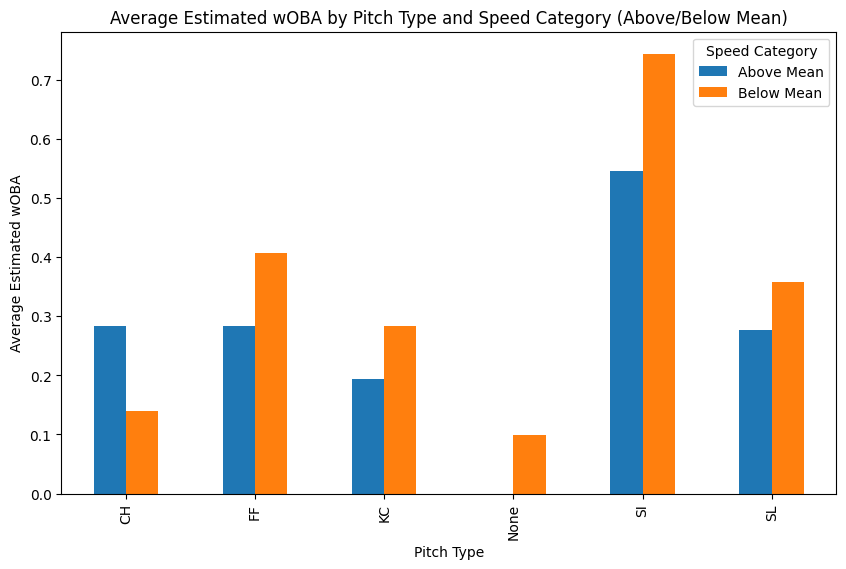

In [12]:
# Step 1: Calculate mean release speed for each pitch type
pitch_type_means = pitcher_data.groupby("pitch_type")["release_speed"].transform("mean")

# Step 2: Create a new column indicating if the speed is above or below the pitch type mean
pitcher_data["speed_category"] = pitcher_data["release_speed"] > pitch_type_means
pitcher_data["speed_category"] = pitcher_data["speed_category"].replace({True: "Above Mean", False: "Below Mean"})

# Step 3: Group by both pitch_type and speed_category, then calculate mean estimated wOBA
woba_by_pitch_speed = pitcher_data.groupby(["pitch_type", "speed_category"])["estimated_woba_using_speedangle"].mean().unstack()

# Step 4: Plot the results
woba_by_pitch_speed.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Pitch Type")
plt.ylabel("Average Estimated wOBA")
plt.title("Average Estimated wOBA by Pitch Type and Speed Category (Above/Below Mean)")
plt.legend(title="Speed Category")
plt.show()


In [13]:
fastball_data = pitcher_data[pitcher_data['pitch_type'] == 'FF'].copy()
list(fastball_data.columns)

['at_bat_number',
 'away_score',
 'away_team',
 'ax',
 'ay',
 'az',
 'babip_value',
 'balls',
 'bat_score',
 'bat_speed',
 'batter',
 'bb_type',
 'delta_home_win_exp',
 'delta_run_exp',
 'des',
 'description',
 'effective_speed',
 'estimated_ba_using_speedangle',
 'estimated_woba_using_speedangle',
 'events',
 'fielder_2',
 'fielder_3',
 'fielder_4',
 'fielder_5',
 'fielder_6',
 'fielder_7',
 'fielder_8',
 'fielder_9',
 'fld_score',
 'game_date',
 'game_pk',
 'game_type',
 'game_year',
 'hc_x',
 'hc_y',
 'hit_distance_sc',
 'hit_location',
 'home_score',
 'home_team',
 'if_fielding_alignment',
 'inning',
 'inning_topbot',
 'iso_value',
 'launch_angle',
 'launch_speed',
 'launch_speed_angle',
 'of_fielding_alignment',
 'on_1b',
 'on_2b',
 'on_3b',
 'outs_when_up',
 'p_throws',
 'pfx_x',
 'pfx_z',
 'pitch_name',
 'pitch_number',
 'pitch_type',
 'pitcher',
 'plate_x',
 'plate_z',
 'player_name',
 'post_away_score',
 'post_bat_score',
 'post_fld_score',
 'post_home_score',
 'release_extens

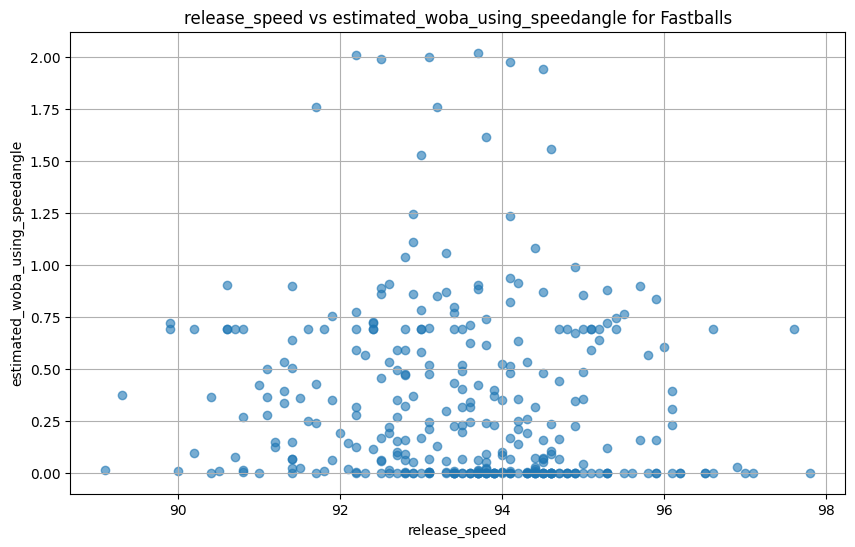

In [14]:
# Define the x and y columns you'd like to plot
x_column = 'release_speed'  # Choose a column name from fastball_data.columns for x-axis
y_column = 'estimated_woba_using_speedangle'  # Choose a column name from fastball_data.columns for y-axis

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(fastball_data[x_column], fastball_data[y_column], alpha=0.6)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'{x_column} vs {y_column} for Fastballs')
plt.grid(True)
plt.show()

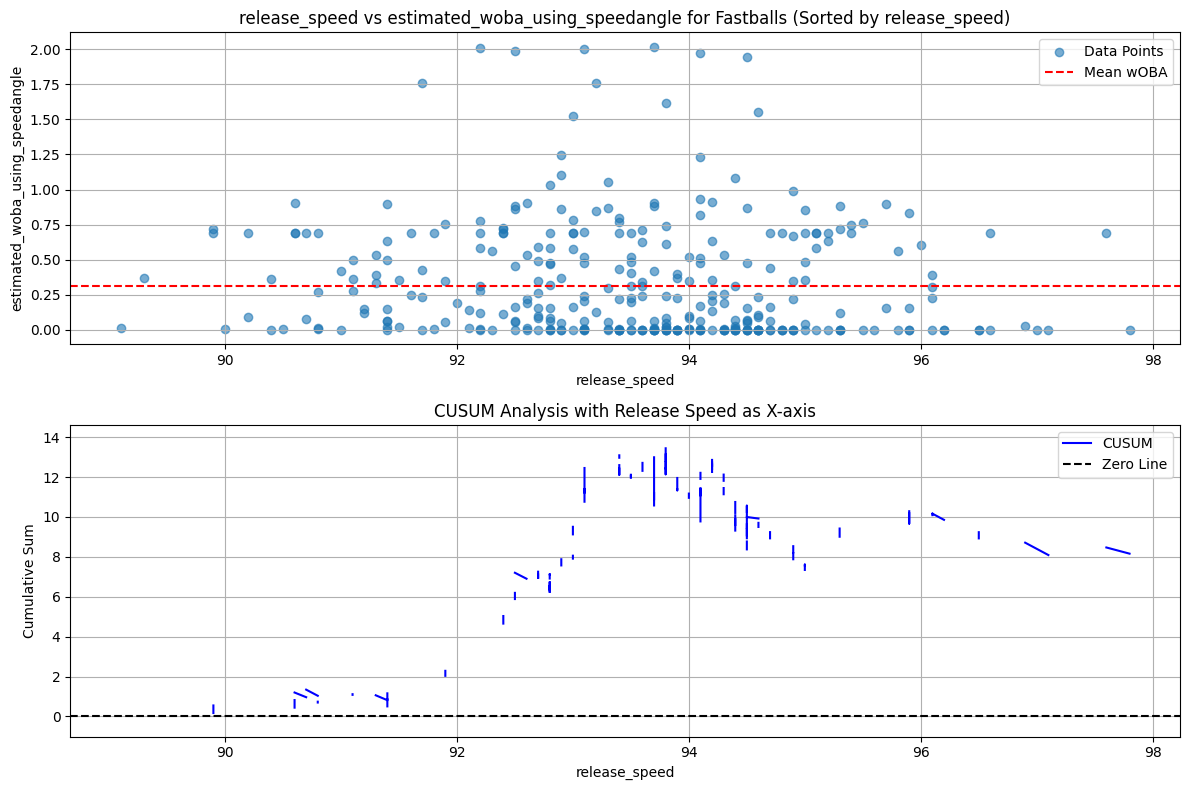

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define x and y columns
x_column = 'release_speed'
y_column = 'estimated_woba_using_speedangle'

# Sort fastball_data by release_speed
fastball_data_sorted = fastball_data.sort_values(by=x_column).reset_index(drop=True)

# Extract the sorted columns
x_data = fastball_data_sorted[x_column]
y_data = fastball_data_sorted[y_column]

# Compute the target value (mean or baseline for wOBA)
target = 0.310
# y_data.mean()  # You can adjust this target based on your goal

# Compute deviations from the target
deviations = y_data - target

# Calculate the CUSUM
cusum = np.cumsum(deviations)

# Plot the scatter plot
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.scatter(x_data, y_data, alpha=0.6, label='Data Points')
plt.axhline(target, color='red', linestyle='--', label='Mean wOBA')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'{x_column} vs {y_column} for Fastballs (Sorted by {x_column})')
plt.legend()
plt.grid(True)

# Plot the CUSUM with release_speed as the x-axis
plt.subplot(2, 1, 2)
plt.plot(x_data, cusum, label='CUSUM', color='blue')
plt.axhline(0, color='black', linestyle='--', label='Zero Line')
plt.xlabel(x_column)
plt.ylabel('Cumulative Sum')
plt.title('CUSUM Analysis with Release Speed as X-axis')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()